# Letra a)

In [3]:
pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.7 MB/s eta 0:00:00


In [17]:
import numpy as np
import pandas as pd
from lmfit import Model

# Função do modelo proposto: c(t) = c1 + c2*t + c3*cos(2*pi*t) + c4*sin(2*pi*t)
def model_func(t, c1, c2, c3, c4):
    return c1 + c2 * t + c3 * np.cos(2 * np.pi * t) + c4 * np.sin(2 * np.pi * t)

# Carregar os dados do arquivo CSV
data = pd.read_csv("co2_mensal.csv")

# Extrair os valores de concentração de CO2 (ppv) e o tempo (t) em meses
t = np.arange(len(data))
co2_values = data["CO2"].values

# Criar um modelo com lmfit
model = Model(model_func)

# Definir valores iniciais para os parâmetros
params = model.make_params(c1=400, c2=0, c3=2, c4=2)

# Realizar o ajuste dos dados ao modelo usando lmfit
result = model.fit(co2_values, params, t=t)

# Extrair os coeficientes ajustados
c1 = result.params['c1'].value
c2 = result.params['c2'].value
c3 = result.params['c3'].value
c4 = result.params['c4'].value

# Exibir os coeficientes ajustados
print("Coeficientes ajustados:")
print("c1:", c1)
print("c2:", c2)
print("c3:", c3)
print("c4:", c4)

Coeficientes ajustados:
c1: -84628.76808150436
c2: 0.18716915030963543
c3: 84995.8949300058
c4: 2.0


# Letra b)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


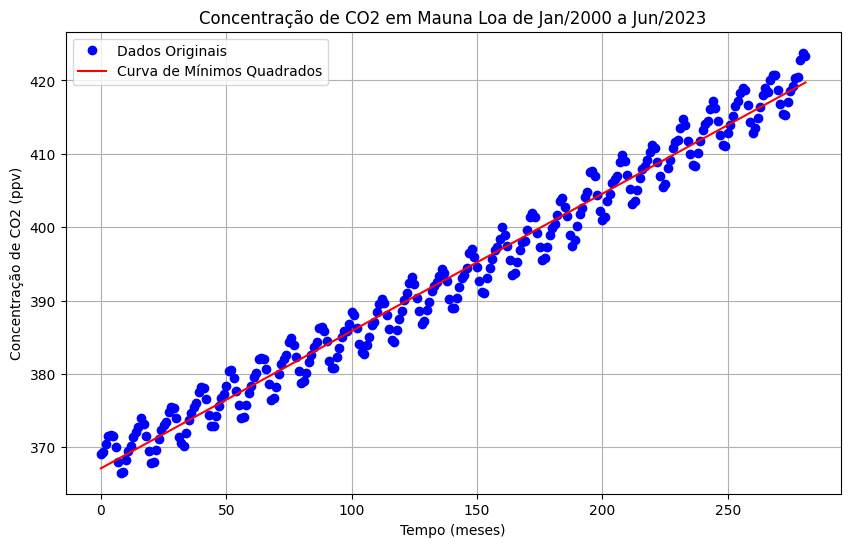

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Ajuste dos dados ao modelo pelo método dos mínimos quadrados
popt, _ = curve_fit(model_func, t, co2_values)

# Extrair os coeficientes ajustados
c1, c2, c3, c4 = popt

# Valores preditos pelo modelo ajustado
co2_predicted = model_func(t, c1, c2, c3, c4)

# Plotar os dados originais e a curva ajustada
plt.figure(figsize=(10, 6))
plt.plot(t, co2_values, label="Dados Originais", marker='o', linestyle='None', color='blue')
plt.plot(t, co2_predicted, label="Curva de Mínimos Quadrados", color='red')
plt.xlabel("Tempo (meses)")
plt.ylabel("Concentração de CO2 (ppv)")
plt.title("Concentração de CO2 em Mauna Loa de Jan/2000 a Jun/2023")
plt.legend()
plt.grid(True)
plt.show()

# Letra c)

In [20]:
from sklearn.metrics import mean_squared_error

# Calcular o Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mean_squared_error(co2_values, co2_predicted))

print("Erro Quadrático Médio (RMSE):", rmse)

Erro Quadrático Médio (RMSE): 2.3492495658302484


# Letra d)

In [21]:
# Estimar a concentração de CO2 em 1 de Janeiro de 2024
t_jan_2024 = len(data) + 1  # Adicionando 1 mês ao último índice do tempo para chegar em Janeiro de 2024
co2_jan_2024 = model_func(t_jan_2024, c1, c2, c3, c4)

print("Estimativa de CO2 em 1 de Janeiro de 2024:", co2_jan_2024, "ppv")

Estimativa de CO2 em 1 de Janeiro de 2024: 420.09570888354216 ppv


# Letra e)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Coeficientes ajustados para o modelo estendido:
c1: 13381.377642944062
c2: 0.18716915031233916
c3: -6507.125397543617
c4: 1.0
c5: -6507.125397543608
Erro Quadrático Médio (RMSE) para o modelo estendido: 2.3492495658264225


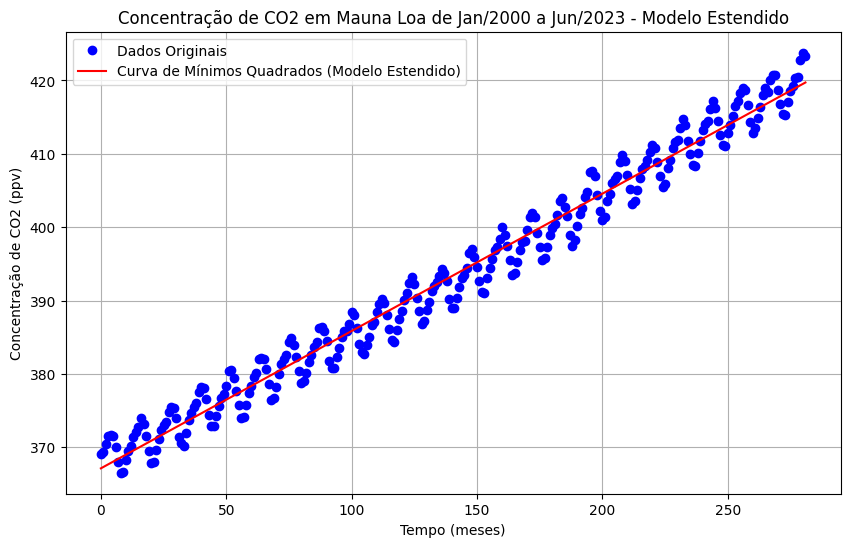

In [23]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Função do modelo estendido: c(t) = c1 + c2*t + c3*cos(2*pi*t) + c4*sin(2*pi*t) + c5*cos(4*pi*t)
def model_func(t, c1, c2, c3, c4, c5):
    return c1 + c2 * t + c3 * np.cos(2 * np.pi * t) + c4 * np.sin(2 * np.pi * t) + c5 * np.cos(4 * np.pi * t)

# Carregar os dados do arquivo CSV
data = pd.read_csv("co2_mensal.csv")

# Extrair os valores de concentração de CO2 (ppv) e o tempo (t) em meses
t = np.arange(len(data))
co2_values = data["CO2"].values

# Ajuste dos dados ao modelo estendido pelo método dos mínimos quadrados
popt, _ = curve_fit(model_func, t, co2_values)

# Extrair os coeficientes ajustados
c1, c2, c3, c4, c5 = popt

# Valores preditos pelo modelo estendido ajustado
co2_predicted = model_func(t, c1, c2, c3, c4, c5)

# Calcular o Erro Quadrático Médio (RMSE) para o modelo estendido
rmse = np.sqrt(mean_squared_error(co2_values, co2_predicted))

print("Coeficientes ajustados para o modelo estendido:")
print("c1:", c1)
print("c2:", c2)
print("c3:", c3)
print("c4:", c4)
print("c5:", c5)

print("Erro Quadrático Médio (RMSE) para o modelo estendido:", rmse)

# Plotar os dados originais e a curva ajustada para o modelo estendido
plt.figure(figsize=(10, 6))
plt.plot(t, co2_values, label="Dados Originais", marker='o', linestyle='None', color='blue')
plt.plot(t, co2_predicted, label="Curva de Mínimos Quadrados (Modelo Estendido)", color='red')
plt.xlabel("Tempo (meses)")
plt.ylabel("Concentração de CO2 (ppv)")
plt.title("Concentração de CO2 em Mauna Loa de Jan/2000 a Jun/2023 - Modelo Estendido")
plt.legend()
plt.grid(True)
plt.show()

# Letra f)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Coeficientes ajustados para o modelo estendido com o termo adicional c5*t^2:
c1: 2503834.7100787824
c2: 0.15324127669159993
c3: -2503465.9999301583
c4: 1.0
c5: 0.0001207397616377337
Erro Quadrático Médio (RMSE) para o modelo estendido com o termo adicional c5*t^2: 2.2375932196073505


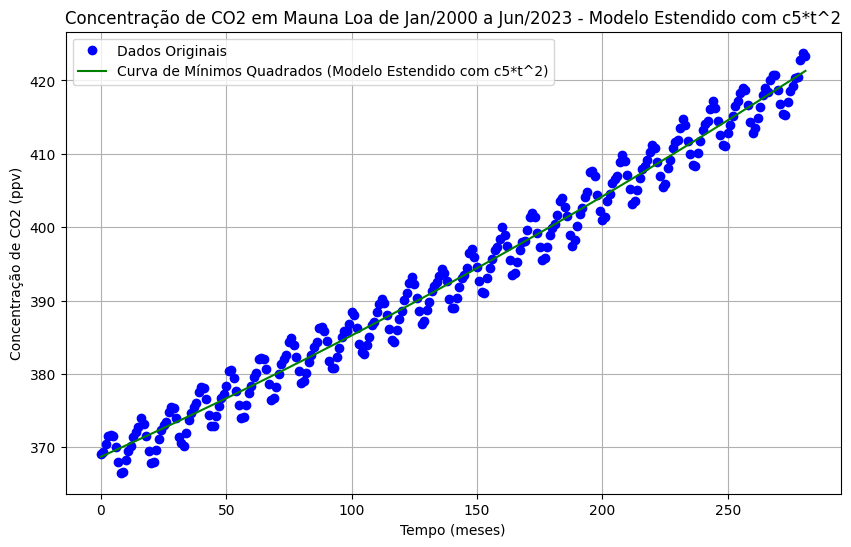

In [25]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Função do modelo estendido com o termo adicional c5*t^2: c(t) = c1 + c2*t + c3*cos(2*pi*t) + c4*sin(2*pi*t) + c5*t^2
def model_func(t, c1, c2, c3, c4, c5):
    return c1 + c2 * t + c3 * np.cos(2 * np.pi * t) + c4 * np.sin(2 * np.pi * t) + c5 * t**2

# Carregar os dados do arquivo CSV
data = pd.read_csv("co2_mensal.csv")

# Extrair os valores de concentração de CO2 (ppv) e o tempo (t) em meses
t = np.arange(len(data))
co2_values = data["CO2"].values

# Ajuste dos dados ao modelo estendido com o termo adicional c5*t^2 pelo método dos mínimos quadrados
popt, _ = curve_fit(model_func, t, co2_values)

# Extrair os coeficientes ajustados
c1, c2, c3, c4, c5 = popt

# Valores preditos pelo modelo estendido com o termo adicional c5*t^2 ajustado
co2_predicted = model_func(t, c1, c2, c3, c4, c5)

# Calcular o Erro Quadrático Médio (RMSE) para o modelo estendido com o termo adicional c5*t^2
rmse = np.sqrt(mean_squared_error(co2_values, co2_predicted))

print("Coeficientes ajustados para o modelo estendido com o termo adicional c5*t^2:")
print("c1:", c1)
print("c2:", c2)
print("c3:", c3)
print("c4:", c4)
print("c5:", c5)

print("Erro Quadrático Médio (RMSE) para o modelo estendido com o termo adicional c5*t^2:", rmse)

# Plotar os dados originais e a curva ajustada para o modelo estendido com o termo adicional c5*t^2
plt.figure(figsize=(10, 6))
plt.plot(t, co2_values, label="Dados Originais", marker='o', linestyle='None', color='blue')
plt.plot(t, co2_predicted, label="Curva de Mínimos Quadrados (Modelo Estendido com c5*t^2)", color='green')
plt.xlabel("Tempo (meses)")
plt.ylabel("Concentração de CO2 (ppv)")
plt.title("Concentração de CO2 em Mauna Loa de Jan/2000 a Jun/2023 - Modelo Estendido com c5*t^2")
plt.legend()
plt.grid(True)
plt.show()